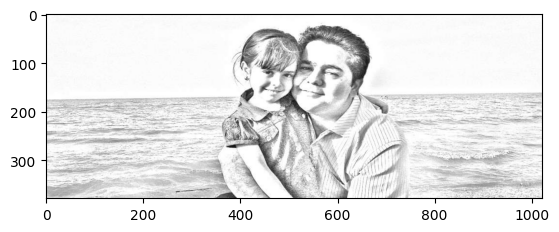

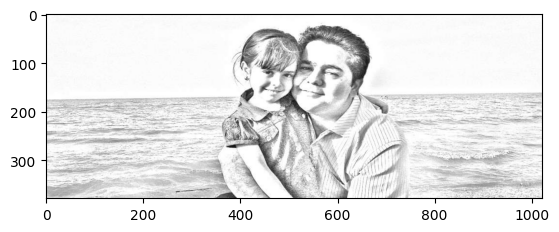

Image dimensions: height = 379, width = 1022, channels = 3
Epoch 1/10
750/750 [==============================] - 54s 71ms/step - loss: 27.2911 - accuracy: 0.0909 - val_loss: 27.3581 - val_accuracy: 0.0987
Epoch 2/10
750/750 [==============================] - 51s 68ms/step - loss: 27.2911 - accuracy: 0.1003 - val_loss: 27.3581 - val_accuracy: 0.1057
Epoch 3/10
750/750 [==============================] - 52s 69ms/step - loss: 27.2911 - accuracy: 0.1038 - val_loss: 27.3581 - val_accuracy: 0.1085
Epoch 4/10
750/750 [==============================] - 52s 69ms/step - loss: 27.2911 - accuracy: 0.1042 - val_loss: 27.3581 - val_accuracy: 0.1060
Epoch 5/10
750/750 [==============================] - 53s 70ms/step - loss: 27.2911 - accuracy: 0.1053 - val_loss: 27.3581 - val_accuracy: 0.1028
Epoch 6/10
750/750 [==============================] - 51s 68ms/step - loss: 27.2911 - accuracy: 0.1034 - val_loss: 27.3581 - val_accuracy: 0.1011
Epoch 7/10
750/750 [==============================] - 50s 67ms/st

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from tensorflow.keras import layers

# Load the image
data = np.array(plt.imread('/content/FB_IMG_1699980572276.jpg'))

# Display the image
plt.imshow(data)
plt.show()

# Display the image
plt.imshow(data)
plt.show()

# Get image dimensions
height, width, channels = data.shape
print(f"Image dimensions: height = {height}, width = {width}, channels = {channels}")

# Convert image to RGB format
data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)

# Resize image to 224x224
data_resized = cv2.resize(data, (224, 224))

# Define the model
model = keras.Sequential([
    layers.Conv2D(16, 3, activation="relu", input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(3),
    layers.Conv2D(32, 3, activation="relu"),
    layers.Conv2D(16, 3, activation="relu"),
    layers.GlobalMaxPooling2D(),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.RMSprop(),
              metrics=["accuracy"])

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

# Evaluate the model
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

# Save the model
model.save("path_to_my_model")